###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c) 2019 Daniel Koehn, based on (c)2018 L.A. Barba, G.F. Forsyth [CFD Python](https://github.com/barbagroup/CFDPython#cfd-python), (c)2014 L.A. Barba, I. Hawke, B. Knaepen [Practical Numerical Methods with Python](https://github.com/numerical-mooc/numerical-mooc#practical-numerical-methods-with-python), also under CC-BY.

In [1]:
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, 'r').read())

# 2D Navier–Stokes: Cavity Flow

In this lecture, we discuss the basics of solving the 2D Navier-Stokes equations for numerical fluid flow modelling. After covering the basic governing equations and finite-difference based solvers, a simple cavity flow problem is solved.

## Governing Equations

The governing equations for fluid flow in an incompressible medium consist of the **conservation of mass (continuity)** equation

$$\vec{\nabla} \cdot  \vec{v} = 0$$

and the **conservation of momentum equation** in vector form for a velocity field $\vec{v}$

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

This represents three scalar equations, one for each velocity component $(u,v,w)$. But we will solve it only in two dimensions, so there will be two scalar equations.

In order to solve these equations, a relation between the pressure and velocity field is required. This can be derived by assuming that the continuity equation acts as constraint to the velocity fields computed by the momentum equation.

Writing the equations in component form leads to 

\begin{equation}
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0 \tag{1}
\end{equation}

\begin{equation}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) \tag{2}
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) \tag{3}
\end{equation}

By apply $\frac{\partial}{\partial x}$ to eq. (2) and $\frac{\partial}{\partial y}$ to eq. (3), adding the resulting equations and using the continuity eq. (1) leads to a **2D Poisson equation for the pressure field**

\begin{equation}
\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right) \tag{4}
\end{equation}

A step-by-step derivation is shown in **Video Lesson 11** of the **Computational Fluid Dynamics Course** by Prof. Lorena Barba:

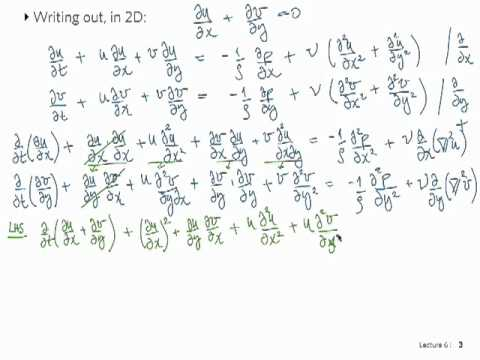

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZjfxA3qq2Lg')

## Cavity Flow with Navier–Stokes

Here is the system of differential equations: two equations for the velocity components $u,v$ and one equation for pressure:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

By looking more closely, we see that the governing equation consists of multiple smaller problems, which we already covered in previous notebooks. 

- 2D non-linear advection problems discussed in the linear form in [this notebook](https://nbviewer.jupyter.org/github/daniel-koehn/Differential-equations-earth-system/blob/master/08_Convection_2D/02_2D_Linear_Advection.ipynb)

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = 0 $$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = 0 $$

- 2D diffusion-type problems discussed in [this lecture](https://github.com/daniel-koehn/Differential-equations-earth-system/tree/master/06_Heat_2D#differential-equations-in-earth-sciences-2d-heat-equation) 

$$\frac{\partial u}{\partial t} = \nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t} = \nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

- 2D Poisson problem discussed in [this lecture](https://github.com/daniel-koehn/Differential-equations-earth-system/tree/master/07_BVP_2D#differential-equations-in-earth-sciences-2d-boundary-value-problems)

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

Additionally, we have pressure gradient terms in the momentum equations $-\frac{1}{\rho}\frac{\partial p}{\partial x}$ and $-\frac{1}{\rho}\frac{\partial p}{\partial y}$.

So, while the whole problem seems to be quite complex at first glimpse, it consists of multiple smaller, well known sub-problems. In the next step, we have to discretize these equations using the finite-difference approach.

### Discretized equations

We try to keep the codes simple, by using forward operators for the time-derivatives, central operators for the spatial derivatives, except for the advection terms, where backward operators are applied [(see this notebook)](https://nbviewer.jupyter.org/github/daniel-koehn/Differential-equations-earth-system/blob/master/04_Advection_1D/03_Numerical_Diffusion.ipynb)

First, let's discretize the $u$-momentum equation, as follows:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Similarly for the $v$-momentum equation:

$$
\begin{split}
&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

Finally, the discretized pressure-Poisson equation can be written thus:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho \left[ \frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

You should write these equations down on your own notes, by hand, following each term mentally as you write it.

As before, let's rearrange the equations in the way that the iterations need to proceed in the code. First, the momentum equations for the velocity at the next time step.


The momentum equation in the $u$ direction:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right)
\end{split}
$$

The momentum equation in the $v$ direction:

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n})\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)
\end{split}
$$

Almost there! Now, we rearrange the pressure-Poisson equation:

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

In order to test the 2D Navier-Stokes FD code, we want to solve a common benchmark problem for numerical fluid dynamics problems, the **lid-driven cavity problem**
<img src="images/drivencavity.svg" style="width: 400px;"/>

governed by the following initial and boundary conditions.

The initial condition is $u, v, p = 0$ everywhere, and the boundary conditions are:

$u=1$ at $y=2$ (the "lid");

$u, v=0$ on the other boundaries;

$\frac{\partial p}{\partial y}=0$ at $y=0$;

$p=0$ at $y=2$

$\frac{\partial p}{\partial x}=0$ at $x=0,2$


Implementing Cavity Flow
----


In [3]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# import JIT from Numba
from numba import jit

In [4]:
nx = 81
ny = 81
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx)) 
b = numpy.zeros((ny, nx))

The pressure Poisson equation that's written above can be hard to write out without typos.  The function `build_up_b` below represents the contents of the square brackets, so that the entirety of the Pressure Poisson Equation (PPE) is slightly more manageable.  

In [5]:
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    ny, nx = b.shape
    
    # loop over spatial grid 
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            
            b[j, i] = (rho * (1 / dt * 
                    ((u[j, i+1] - u[j, i-1]) / 
                     (2 * dx) + (v[j+1, i] - v[j-1, i]) / (2 * dy)) -
                    ((u[j, i+1] - u[j, i-1]) / (2 * dx))**2 -
                      2 * ((u[j+1, i] - u[j-1, i]) / (2 * dy) *
                           (v[j, i+1] - v[j, i-1]) / (2 * dx))-
                          ((v[j+1, i] - v[j-1, i]) / (2 * dy))**2))

    return b

The function `pressure_poisson` is also defined to help segregate the different rounds of calculations.  Note the presence of the pseudo-time variable `nit`.  This sub-iteration in the Poisson calculation helps ensure a divergence-free field.  

In [6]:
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def pressure_poisson(p, dx, dy, b):
    
    # Solve Pressure Poisson Equation using Gauss-Seidel method
    for q in range(nit):
        
        # loop over spatial grid 
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                                
                
                p[j, i] = (((p[j, i+1] + p[j, i-1]) * dy**2 + 
                            (p[j+1, i] + p[j-1, i]) * dx**2) /
                            (2 * (dx**2 + dy**2)) -
                            dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                            b[j,i])

        # Boundary conditions
        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

Finally, the rest of the cavity flow equations are wrapped inside the function `cavity_flow`, allowing us to easily plot the results of the cavity flow solver for different lengths of time.  

In [7]:
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        
        un = u.copy()
        vn = v.copy()
        
        # solve Poisson equation to update pressure field
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        # update velocity components
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                
                u[j, i] = (un[j, i]-
                                 un[j, i] * dt / dx *
                                (un[j, i] - un[j, i-1]) -
                                 vn[j, i] * dt / dy *
                                (un[j, i] - un[j-1, i]) -
                                 dt / (2 * rho * dx) * (p[j, i+1] - p[j, i-1]) +
                                 nu * (dt / dx**2 *
                                (un[j, i+1] - 2 * un[j, i] + un[j, i-1]) +
                                 dt / dy**2 *
                                (un[j+1, i] - 2 * un[j, i] + un[j-1, i])))

                v[j, i] = (vn[j, i] -
                                un[j, i] * dt / dx *
                               (vn[j, i] - vn[j, i-1]) -
                                vn[j, i] * dt / dy *
                               (vn[j, i] - vn[j-1, i]) -
                                dt / (2 * rho * dy) * (p[j+1, i] - p[j-1, i]) +
                                nu * (dt / dx**2 *
                               (vn[j, i+1] - 2 * vn[j, i] + vn[j, i-1]) +
                                dt / dy**2 *
                               (vn[j+1, i] - 2 * vn[j, i] + vn[j-1, i])))

        # apply boundary conditions
        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

Let's start with `nt = 100` and see what the solver gives us:

In [8]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

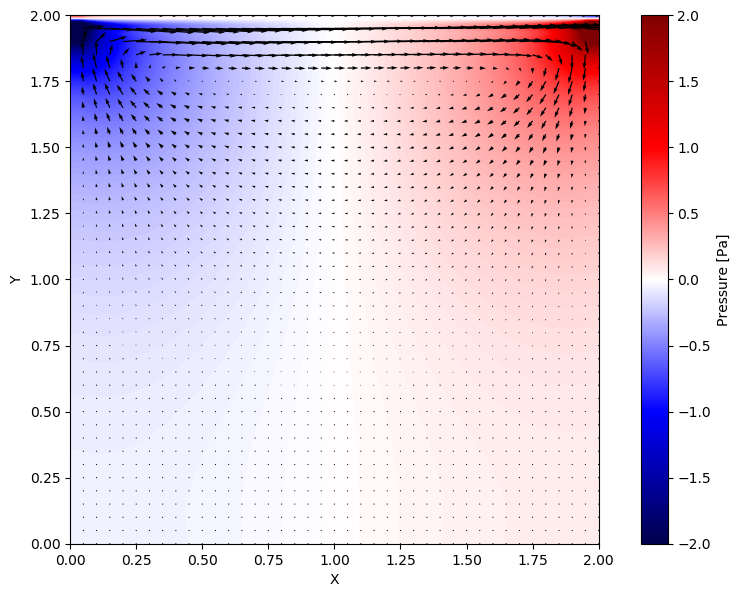

In [9]:
fig = pyplot.figure(figsize=(11,7), dpi=100)

extent = [numpy.min(X), numpy.max(X),numpy.min(Y), numpy.max(Y)]
cmap = 'seismic'
im = pyplot.imshow(numpy.flipud(p), extent=extent, interpolation='spline36', cmap=cmap, vmin=-2, vmax=2)
cbar = pyplot.colorbar(im)
cbar.set_label('Pressure [Pa]')

# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

You can see that two distinct pressure zones are forming and that the spiral pattern expected from lid-driven cavity flow is beginning to form.  Experiment with different values of `nt` to see how long the system takes to stabilize.  

In [10]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 700
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

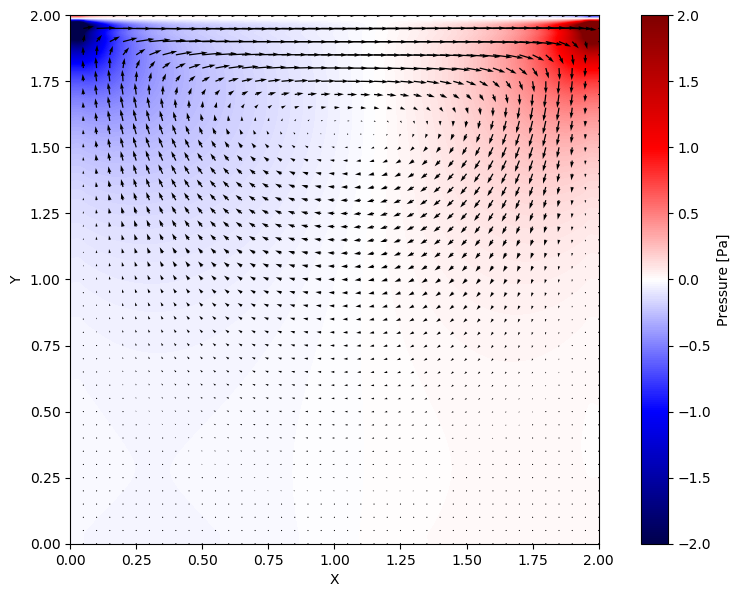

In [11]:
fig = pyplot.figure(figsize=(11,7), dpi=100)

extent = [numpy.min(X), numpy.max(X),numpy.min(Y), numpy.max(Y)]
cmap = 'seismic'
im = pyplot.imshow(numpy.flipud(p), extent=extent, interpolation='spline36', cmap=cmap, vmin=-2, vmax=2)
cbar = pyplot.colorbar(im)
cbar.set_label('Pressure [Pa]')

# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

The quiver plot shows the magnitude of the velocity at the discrete points in the mesh grid we created.
(We're actually only showing half of the points because otherwise it's a bit of a mess.  The `X[::2, ::2]` syntax above is a convenient way to ask for every other point.)

Another way to visualize the flow in the cavity is to use a `streamplot`:

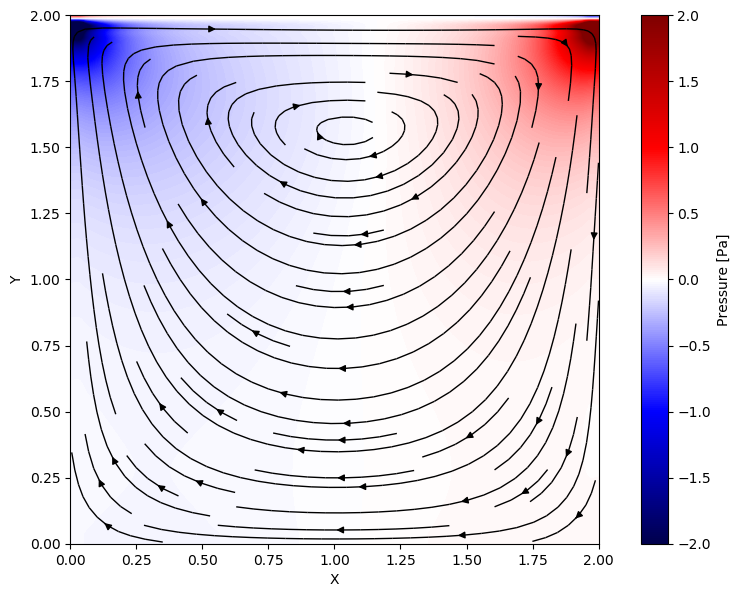

In [12]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)

extent = [numpy.min(X), numpy.max(X),numpy.min(Y), numpy.max(Y)]
cmap = 'seismic'
im = pyplot.imshow(numpy.flipud(p), extent=extent, interpolation='spline36', cmap=cmap, vmin=-2, vmax=2)
cbar = pyplot.colorbar(im)
cbar.set_label('Pressure [Pa]')

pyplot.streamplot(X, Y, u, v, linewidth=1, color='k')
pyplot.xlabel('X')
pyplot.ylabel('Y');

## Learn More

The interactive module [**12 steps to Navier–Stokes**](https://github.com/barbagroup/CFDPython) is one of several components of the [Computational Fluid Dynamics class taught by Prof. Lorena A. Barba](https://www.youtube.com/playlist?list=PL30F4C5ABCE62CB61) in Boston University between 2009 and 2013.

For a sample of what the other components of this class are, you can explore the **Resources** section of the Spring 2013 version of [the course's Piazza site](https://piazza.com/bu/spring2013/me702/resources).

***